In [1]:
pip install "scikit-learn<1.2"

  Using cached scikit_learn-1.1.3-cp39-cp39-win_amd64.whl.metadata (10 kB)
Using cached scikit_learn-1.1.3-cp39-cp39-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [6]:
df = pd.DataFrame(boston.data)

In [7]:
df.columns = boston.feature_names

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df['PRICE'] = boston.target

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
X = df.drop(columns=['PRICE'])

y = df['PRICE']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Converting Data to DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
# Preview the training data
X_train_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
325,0.19186,0.0,7.38,0.0,0.4930,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
335,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
56,0.02055,85.0,0.74,0.0,0.4100,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
437,15.17720,0.0,18.10,0.0,0.7400,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45
409,14.43830,0.0,18.10,0.0,0.5970,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78


In [14]:
# Converting Data to DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
# Preview the training data
X_train_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
325,0.19186,0.0,7.38,0.0,0.4930,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
335,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
56,0.02055,85.0,0.74,0.0,0.4100,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
437,15.17720,0.0,18.10,0.0,0.7400,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45
409,14.43830,0.0,18.10,0.0,0.5970,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78


In [15]:
# View summary of datasets
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB


In [16]:

# distribution of numerical feature values across the samples
X_train_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [17]:
# Create column transformer
ct = make_column_transformer(
 (MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)
# Normalization and data type change
X_train = ct.fit_transform(X_train).astype('float32')
X_test = ct.transform(X_test).astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Distribution of X_train feature values after normalization
pd.DataFrame(X_train).describe()


,0,1,2,3,4,5,6,7,8,9,10,11
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.040465,0.115693,0.379446,0.352848,0.498859,0.676173,0.243577,0.363323,0.414184,0.608332,0.897570,0.296009
std,0.099757,0.231525,0.255356,0.242190,0.144285,0.288310,0.193802,0.373466,0.317123,0.237096,0.230890,0.196203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000814,0.000000,0.162593,0.137860,0.412345,0.439238,0.087140,0.130435,0.175573,0.446809,0.945969,0.139142
50%,0.002836,0.000000,0.289630,0.314815,0.477324,0.770340,0.186066,0.173913,0.272901,0.648936,0.985892,0.253725
75%,0.035900,0.200000,0.642963,0.506173,0.564114,0.934604,0.388400,0.478261,0.914122,0.808511,0.997113,0.404042
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Reserve data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((363, 12), (41, 12), (363,), (41,))

In [19]:

# Set random seed
tf.random.set_seed(42)
# Building the model
model = tf.keras.Sequential([
 tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X_train.shape[1],), name='Dense_1'),
 tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
 tf.keras.layers.Dense(units=1, name='Prediction')
])
# Compiling the model
model.compile(
 loss = tf.keras.losses.mean_squared_error,
 optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
 metrics = ['mse']
)
# Training the model
history = model.fit(
 X_train,
 y_train,
 batch_size=32,
 epochs=50,
 validation_data=(X_val, y_val)
)


Epoch 1/50


12/12 [==============================] - 1s 27ms/step - loss: 312.6326 - mse: 312.6326 - val_loss: 111.3437 - val_mse: 111.3437
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 100.5434 - mse: 100.5434 - val_loss: 99.7228 - val_mse: 99.7228
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 72.3766 - mse: 72.3766 - val_loss: 48.5127 - val_mse: 48.5127
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 57.7526 - mse: 57.7526 - val_loss: 32.7419 - val_mse: 32.7419
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 53.1164 - mse: 53.1164 - val_loss: 21.2629 - val_mse: 21.2629
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 38.0636 - mse: 38.0636 - val_loss: 23.4961 - val_mse: 23.4961
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 35.0191 - mse: 35.0191 - val_loss: 21.0038 - val_mse: 21.0038
Epoch 8/50
12/12 [==============================] - 

In [20]:
# Preview the mean value of training and validation data
y_train.mean(), y_val.mean()


(22.862259, 22.214634)

In [21]:
# Evaluate the model on the test data
print("Evaluation on Test data \n")
loss, mse = model.evaluate(X_test, y_test, batch_size=32)
print(f"\nModel loss on test set: {loss}")
print(f"Model mean squared error on test set: {(mse):.2f}")


Evaluation on Test data 

4/4 [==============================] - 0s 3ms/step - loss: 17.9464 - mse: 17.9464

Model loss on test set: 17.946374893188477
Model mean squared error on test set: 17.95


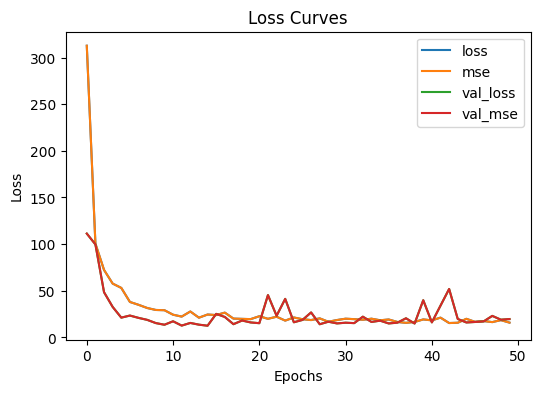

In [22]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()


In [23]:
# Make predictions
print(X_test[0])
y_pred = model.predict(X_test)
# View the first prediction
y_pred

[9.2978147e-04 0.0000000e+00 1.2259259e-01 2.5720164e-01 5.1921904e-01
 8.3625126e-01 1.3792069e-01 1.7391305e-01 2.0801526e-01 4.2553192e-01
 9.9646980e-01 2.0171082e-01]
4/4 [==============================] - 0s 5ms/step


array([[23.44567  ],
       [31.751928 ],
       [12.696455 ],
       [23.413048 ],
       [14.257381 ],
       [19.890776 ],
       [16.205933 ],
       [12.987267 ],
       [20.257772 ],
       [17.59991  ],
       [18.372313 ],
       [17.065054 ],
       [ 8.318906 ],
       [19.3668   ],
       [18.037163 ],
       [26.30002  ],
       [17.71271  ],
       [10.676889 ],
       [42.048756 ],
       [13.411948 ],
       [23.665934 ],
       [24.997808 ],
       [13.9030905],
       [20.60716  ],
       [13.571182 ],
       [12.864525 ],
       [20.863476 ],
       [11.999673 ],
       [17.570118 ],
       [16.873507 ],
       [19.241968 ],
       [22.222563 ],
       [23.784658 ],
       [17.400686 ],
       [12.924535 ],
       [16.277586 ],
       [27.618904 ],
       [19.47441  ],
       [18.590733 ],
       [22.697386 ],
       [13.923357 ],
       [28.560698 ],
       [45.557014 ],
       [17.159786 ],
       [22.798788 ],
       [13.322602 ],
       [15.0987425],
       [23.50